In [1]:
from qiskit import *

In [2]:
def syndrome(crt):
    crt.h(range(9))
    crt.cnot(0, 9)
    crt.cnot(1, 9)
    crt.cnot(3, 9)
    crt.cnot(4, 9)
    crt.cnot(2, 10)
    crt.cnot(5, 10)
    crt.cnot(3, 11)
    crt.cnot(6, 11)
    crt.cnot(4, 12)
    crt.cnot(5, 12)
    crt.cnot(7, 12)
    crt.cnot(8, 12)
    crt.barrier()
    crt.h(range(9))
    
    crt.cnot(0, 13)
    crt.cnot(1, 13)
    crt.cnot(1, 14)
    crt.cnot(2, 14)
    crt.cnot(4, 14)
    crt.cnot(5, 14)
    crt.cnot(3, 15)
    crt.cnot(4, 15)
    crt.cnot(6, 15)
    crt.cnot(7, 15)
    crt.cnot(7, 16)
    crt.cnot(8, 16)
    crt.barrier()
    
    crt.measure(list(map((lambda x: x + 9), range(8))), list(map((lambda x: x + 9), range(8))))
    crt.measure(range(9), range(9))
    return crt

q0_0: 
      
q0_1: 
      
c0: 2/

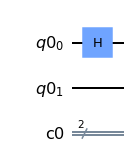

In [9]:
circuit.cx(qr[0], qr[1])

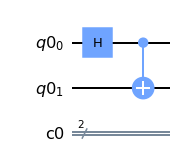

In [10]:
circuit.draw(output='mpl')

In [11]:
circuit.measure(qr, cr)

In [8]:
circuit = syndrome(QuantumCircuit(17, 17))

In [9]:
simulator = Aer.get_backend('qasm_simulator')

In [24]:
result = execute(circuit, backend = simulator, shots = 2048).result()

In [6]:
from qiskit.tools.visualization import plot_histogram

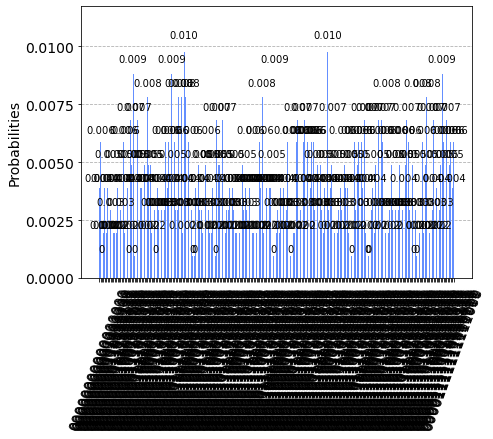

In [15]:
plot_histogram(result.get_counts(circuit))

In [26]:
states = result.get_counts(circuit)
for key in states:
    if key.endswith('00000000'):
        print(key[0:9])

000000000
000010000
000010010
000010100
000010110
000011000
000011010
000011100
000011110
000000010
000000100
000000110
000001000
000001010
000001100
000001110


In [20]:
provider = IBMQ.get_provider('ibm-q')

In [22]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [23]:
job = execute(circuit, backend=qcomp)

In [25]:
from qiskit.tools.monitor import job_monitor

In [29]:
job_monitor(job)

Job Status: job has successfully run


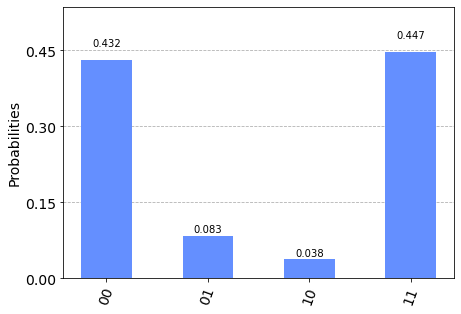

In [28]:
qresult = job.result()
plot_histogram(qresult.get_counts(circuit))